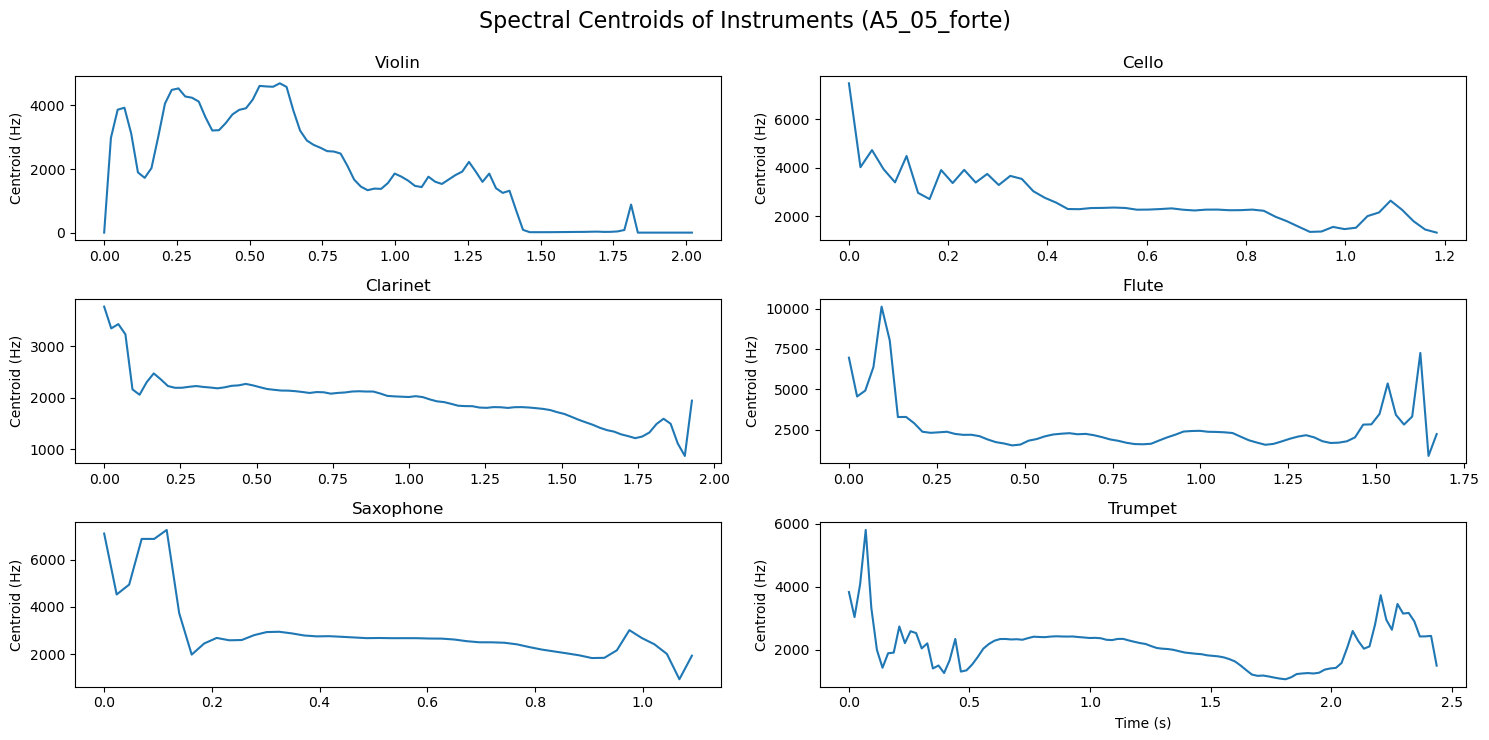

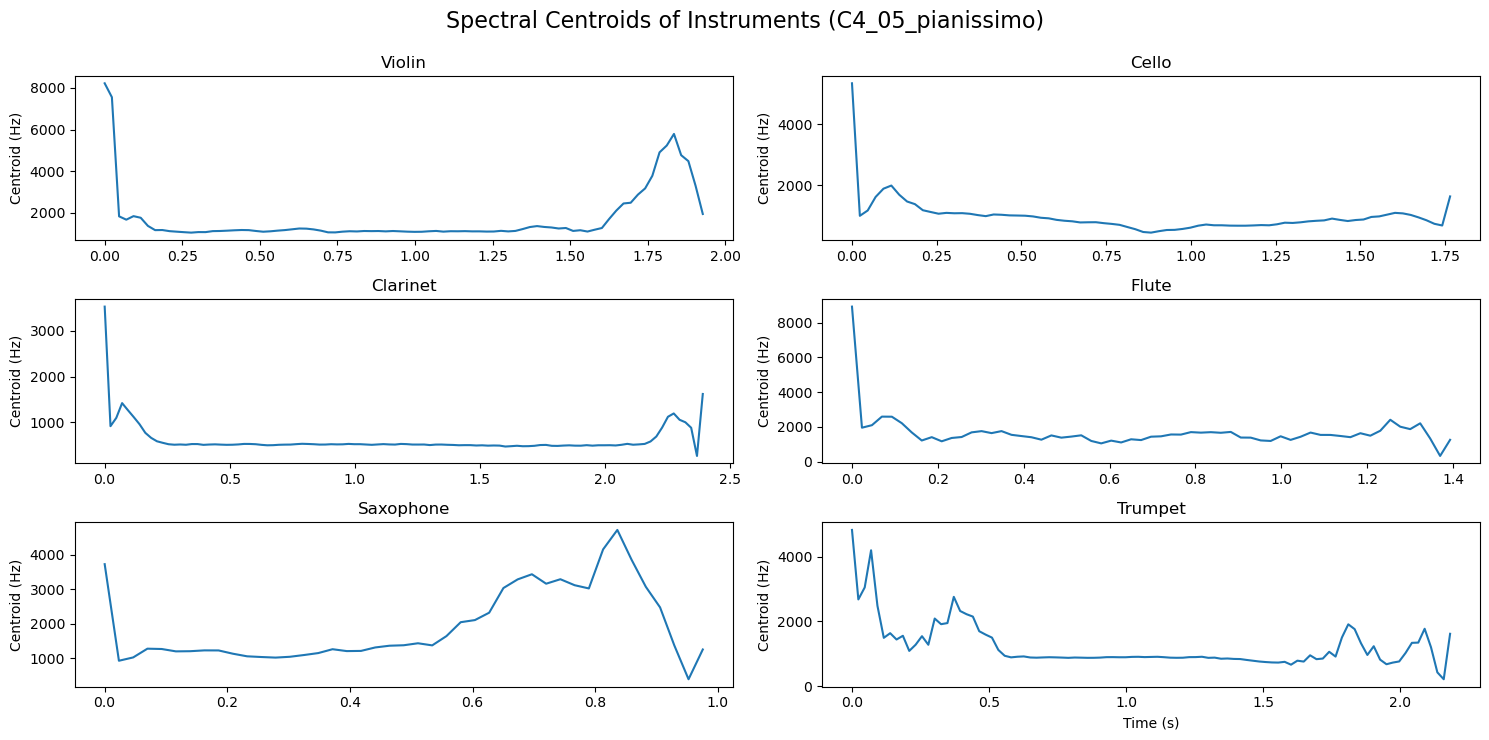

In [22]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

BASE_PATH = os.path.join("data", "all-samples")
path = os.path.join(BASE_PATH, '')

def get_instruments_path(path, instrument_name, note_filter=None):
    instrument_path = os.path.join(path, instrument_name)
    if not os.path.exists(instrument_path):
        raise ValueError(f'Instrument folder not found: {instrument_path}')
    
    instrument_files = [
        f for f in os.listdir(instrument_path)
        if f.endswith(('.wav', '.mp3')) and (note_filter in f if note_filter else True)
    ]
    return instrument_path, instrument_files

def compute_centroids(path, instrument_name, note_filter=None):
    instrument_path, instrument_files = get_instruments_path(path, instrument_name, note_filter)
    data = {}

    for file in instrument_files:
        try:
            file_path = os.path.join(instrument_path, file)
            y, sr = librosa.load(file_path, sr=None)
            centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
            label = os.path.splitext(file)[0]
            data[label] = centroid
        except Exception as e:
            print(f"Error with {file}: {e}")
            continue
    return data

def plot_centroids_together(path, instrument_name, note_filter=None):
    data = compute_centroids(path, instrument_name, note_filter)
    plt.figure(figsize=(15, 6))
    plt.xlabel("Time")
    plt.ylabel("Spectral Centroid (Hz)")
    plt.title(f"Spectral Centroids for {instrument_name.capitalize()} Samples ({note_filter})")

    for label, centroid in data.items():
        times = librosa.times_like(centroid)
        plt.plot(times, centroid.T, label=label)

    # plt.legend(loc="upper right", fontsize=8)
    plt.tight_layout()
    plt.show()

def plot_multiple_instruments_centroids(path, instrument_names, note_filter=None):
    num_instruments = len(instrument_names)
    rows, cols = 3, 2
    fig, axs = plt.subplots(rows, cols, figsize=(15, 2.5 * rows))
    axs = axs.flatten()

    for i, instrument_name in enumerate(instrument_names):
        ax = axs[i]
        data = compute_centroids(path, instrument_name, note_filter)
        for label, centroid in data.items():
            times = librosa.times_like(centroid)
            ax.plot(times, centroid.T)
        ax.set_title(instrument_name.capitalize())
        ax.set_ylabel("Centroid (Hz)")

    # Hide unused subplots, if any
    for j in range(len(instrument_names), len(axs)):
        fig.delaxes(axs[j])

    axs[min(len(instrument_names), len(axs)) - 1].set_xlabel("Time (s)")

    # Overall title
    fig.suptitle(f"Spectral Centroids of Instruments ({note_filter})", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.99])  # leave space for suptitle
    plt.show()


# plot_centroids_together(path, 'violin', note_filter="A5_05_forte_arco-normal")
# plot_centroids_together(path, 'cello', note_filter="A5_05_forte_arco-normal")
# plot_centroids_together(path, 'clarinet', note_filter="A5_05_forte_normal")
# plot_centroids_together(path, 'flute', note_filter="A5_05_forte_normal")
# plot_centroids_together(path, 'saxophone', note_filter="A5_05_forte_normal")
# plot_centroids_together(path, 'trumpet', note_filter="A5_05_forte_normal")

instrument_list = ['violin', 'cello', 'clarinet', 'flute', 'saxophone', 'trumpet']

plot_multiple_instruments_centroids(path, instrument_list, "A5_05_forte")
plot_multiple_instruments_centroids(path, instrument_list, "C4_05_pianissimo")